# Fitting Models Exercise 1

## Imports

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

## Fitting a quadratic curve

For this problem we are going to work with the following model:

$$ y_{model}(x) = a x^2 + b x + c $$

The true values of the model parameters are as follows:

In [72]:
a_true = 0.5
b_true = 2.0
c_true = -4.0

First, generate a dataset using this model using these parameters and the following characteristics:

* For your $x$ data use 30 uniformly spaced points between $[-5,5]$.
* Add a noise term to the $y$ value at each point that is drawn from a normal distribution with zero mean and standard deviation 2.0. Make sure you add a different random number to each point (see the `size` argument of `np.random.normal`).

After you generate the data, make a plot of the raw data (use points).

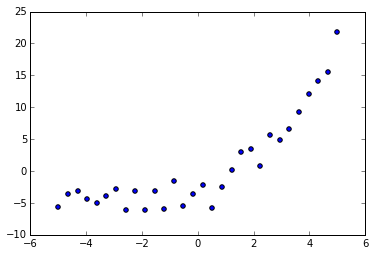

In [73]:
N=30
SD=2.0
x = np.linspace(-5,5,N)
y =a_true*x**2 + b_true*x + c_true +np.random.normal(0,SD,N)

plt.scatter(x,y)

In [74]:
assert True # leave this cell for grading the raw data generation and plot

Now fit the model to the dataset to recover estimates for the model's parameters:

* Print out the estimates and uncertainties of each parameter.
* Plot the raw data and best fit of the model.

In [75]:
def ymodel(x,a,b,c):
    return a*x**2 + b*x + c

In [76]:
theta_best, theta_cov = opt.curve_fit(ymodel, x, y, sigma=SD)

In [77]:
print('a = {0:.3f} +/- {1:.3f}'.format(theta_best[0], np.sqrt(theta_cov[0,0])))
print('b = {0:.3f} +/- {1:.3f}'.format(theta_best[1], np.sqrt(theta_cov[1,1])))
print('c = {0:.3f} +/- {1:.3f}'.format(theta_best[2], np.sqrt(theta_cov[2,2])))


a = 0.443 +/- 0.043
b = 2.050 +/- 0.114
c = -3.171 +/- 0.510


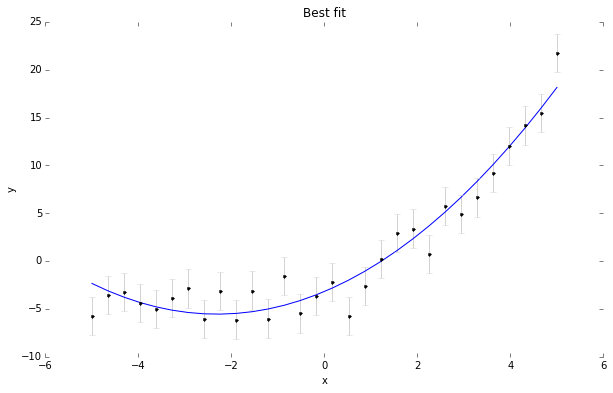

In [83]:
x=np.linspace(-5,5,30)
yfit = theta_best[0]*x**2 + theta_best[1]*x + theta_best[2]
plt.figure(figsize=(10,6,))
plt.plot(x, yfit)
plt.errorbar(x, y, 2.0,fmt='.k', ecolor='lightgray')
plt.xlabel('x')
plt.ylabel('y')
plt.box(False)
plt.ylim(-10,25)
plt.title('Best fit')

In [79]:
assert True # leave this cell for grading the fit; should include a plot and printout of the parameters+errors